# Basic Calculus for Finance


## 1.3 Analysis of Financial Returns

- 1.3.1  Discrete and Continuous Time Notation
- 1.3.2 Portfolio Holdings and Portfolio Weights
- 1.3.3 Profit and Loss
- 1.3.4 Percentage and Log Returns
- 1.3.5 Geometric Brownian Motion
- 1.3.6 Discrete and Continuous Compounding in Discrete Time
- 1.3.7 Period Log Returns in Discrete Time
- 1.3.8 Return on a Linear Portfolio
- 1.3.9 Sources of Returns

### 1.3.1 Discrete and Continuous Time Notation

In [1]:
from visualisations import *

Theoretical pricing models using continuous time assumptions may be easier to derive, but in reality we can only observe interest rates and asset prices in discrete time intervals.

Both approaches to financial modelling were developed independently and therefore have different notations.

**Continuous Time**  

$S(t)$ is used to denote the *continuous time* value of an investment or asset price in a portfolio at time $t$.  

$\Delta$ in continuous time notation is used to denote an *increment* or small change in the value of a variable.

$\Delta X$ increment to a random variable $X$

**Discrete Time**  

$P_t$ is used to denote the value of an investment or asset price in a portfolio at a *discrete time* interval.

$\Delta$ in discrete time notation denotes the *first difference operator* and describes the difference between two consecutive values.  

$\Delta_t$ represents a small amount of time


Change in price when looking backward
$$\Delta P_t = P_t - P_{t-1}$$  

Change in price when looking forward
$$\Delta P_t = P_{t+1} - P_t$$  

### 1.3.2 Portfolio Holdings and Portfolio Weights

A portfolio can consist of all long positions with positive values, short positions with negative values (i.e. borrowing a position you do not own and agree to return at a later date), and a long-short combination of both long and short positions.  

If there was no rebalancing, dividends, or coupon payments the value of the portfolio at any time $t > 0$ would be:  

$$P_t = \sum_{i = 1}^{k}n_{i}p_{it}$$

$P_t$ = Portfolio value at time $t$  
$k$ = number of assets in the portfolio  
$i$ = price of individual asset in the portfolio  
$n_i$ = unit amount of an asset of $i$  
$t$ = observed time value


The portfolio descriptions above imply that this value will be positive for long portfolios, negative for short portfolios, and either positive, negative, or zero for a long-short portfolio.  

We can also derive that our no rebalancing, dividends, or coupons assumption results in the weights of the portfolio changing over time.

The proportion invested in each asset at a given time gives us the *portfolio weights* at time $t$ $w_{it}$. 

$$w_{it} = \frac{n_{i}p_{it}}{P_{t}}$$

The weights can also take positive and negative values depending on the type of portfolio holdings.  

The sum of the weights in a *self-financing* portfolio will be $0$.  

The sum of the weights in a *fully-funded* portfolio will be $1$.  

$\text{Example}$  

Constructing a table containing year, price and unit vectors  
Vectors in this context representing dynamic arrays that can change in size.

In [2]:
import pandas as pd
import numpy as np

# Create a table of two asset prices in a portfolio over time
# Using a DataFrame to construct a table of year, price and unit vectors
two_assets =   pd.DataFrame({  
    "Year": [2021, 2022, 2023, 2024],
    "Asset 1 Price": [100, 125, 80, 120],
    "Asset 2 Price": [200, 500, 250, 400],
    "Asset 1 Units": [600, 600, 600, 600],
    "Asset 2 Units": [200, 200, 200, 200]})

two_assets

,Year,Asset 1 Price,Asset 2 Price,Asset 1 Units,Asset 2 Units
0,2021,100,200,600,200
1,2022,125,500,600,200
2,2023,80,250,600,200
3,2024,120,400,600,200


And deriving the values of each asset, the value of the portfolio, and the asset weights each year..

In [3]:
# Finding the value of each asset at time in our year vector by multiplying the price by the units
# We will cover the vector multiplication occurring here in the next chapter

two_assets[["Asset 1 Value", "Asset 2 Value"]] = (
    two_assets[["Asset 1 Price", "Asset 2 Price"]].values
    * two_assets[["Asset 1 Units", "Asset 2 Units"]].values
)

two_assets["Portfolio Value"] = two_assets["Asset 1 Value"] + two_assets["Asset 2 Value"]
two_assets["Asset 1 Weight"] = round(two_assets["Asset 1 Value"] / two_assets["Portfolio Value"], 4)
two_assets["Asset 2 Weight"] = round(two_assets["Asset 2 Value"] / two_assets["Portfolio Value"], 4)

# Rearranging column order
two_assets = two_assets[["Year", "Asset 1 Price", "Asset 2 Price", "Asset 1 Units", "Asset 2 Units", 
                         "Asset 1 Weight", "Asset 2 Weight", "Asset 1 Value", "Asset 2 Value", "Portfolio Value"]]

two_assets

,Year,Asset 1 Price,Asset 2 Price,Asset 1 Units,Asset 2 Units,Asset 1 Weight,Asset 2 Weight,Asset 1 Value,Asset 2 Value,Portfolio Value
0,2021,100,200,600,200,0.6000,0.4000,60000,40000,100000
1,2022,125,500,600,200,0.4286,0.5714,75000,100000,175000
2,2023,80,250,600,200,0.4898,0.5102,48000,50000,98000
3,2024,120,400,600,200,0.4737,0.5263,72000,80000,152000


Illustrates how the weights of a portfolio will change as asset prices change over time.  

Rebalancing is required to try to maintain allocation targets.  

### 1.3.3 Profit and Loss

**Discrete Time**  

The discrete time case $P_t$ denotes the value of a portfolio at a given time $t$.

The *profit and loss* or P&L is the change in value between two consecutive periods. 

Therefore the P&L at time $t$ is calculated by the previous formulas depending on if we are looking at historical data (*backward difference operator*) or forecasted data (*forward difference operator*).  

Historical P&L  - Discrete Time  
$$\Delta P_t = P_t - P_{t-1}$$  

Forecasted P&L  - Discrete Time  
$$\Delta P_t = P_{t+1} - P_t$$  



**Continuous Time**  

The change in P&L over an infinitesimal interval of time $\Delta t$ is  

Historical P&L - Continuous Time  

$$S(t) - S(t - \Delta t)$$  

Forecasted P&L  - Continuous Time  

$$S(t + \Delta t) - S(t)$$  

The change in P&L with respect to the change in time in the continuous case brings us back to the definition of the derivative  
<br>

$$
\lim_{\Delta t \to 0} \frac{S(t + \Delta t) - S(t)}{\Delta t} = \lim_{\Delta t \to 0} \frac{S(t) - S(t + \Delta t)}{\Delta t} = \frac{dS(t)}{dt}
$$
<br>

So P&L in continuous time is denoted by the differential $dS(t)$

Important to note that P&L is measured in value terms i.e. the investment units in the currency used.  

Given the difference in economic significance of P&L values over time, returns are preferred for analysis.

### 1.3.4 Percentage and Log Returns

**Discrete Time**

Assuming $P_t$ is always positive and there are no dividends or coupons paid  

The one-period percentage backward-looking return is  

$$R_t = \frac{P_{t} - P_{t - 1}}{P_{t - 1}} = \frac{\Delta P_t}{P_{t - 1}}$$  

As noted earlier P&L is measured in value terms, but the return here is the relative change in value and is measured in percentage.  

Using backward-looking returns unless explicitly noted otherwise as the main results are the same and for simplification.  


Measuring P&L in relative percentage returns presents a challenge as the investment value can be negative or zero.  

For this reason long-short portfolios are often analysed by their P&L. The author does note that if it is essential to work with returns, one might measure P&L relative to the *size* of investment needed for the trade.  

Provided the price is never 0, the one-period return would be  

$$
R_t = \frac{\Delta P_t}{|P_{t - 1}|}
$$

**Returns on a Long-Short Portfolio**  

$\text{Example}$

Supposing a British bank sells short £3 million of $\text{USD}$ currency to purchase sterling $\text{GBP}$.  

The exchange rate being:  

$$
1.15 \, \text{USD} \, \text{per} \, 1.00 \, \text{GBP} \quad \text{or} \quad \frac{\$1.15}{£1.00}
$$  

The bank ends up closing out the position, but the exchange rate has changed to:  

$$1.39 \, \text{USD} \, \text{per} \, 1.00 \, \text{GBP} \quad \text{or} \quad \frac{\$1.39}{£1.00}  
$$    

What would the bank's P&L be in terms of £ since it is from their perspective and the corresponding return?  

We can assume interest rates are zero for each currency for simplicity.  

*- Side note on this example*  

This is quite similar to my situation as a US student completing my MBA in the UK so I changed the rates from the example in the text to what I experienced as a post-grad student.  

My university was paid in $\text{GBP}$ from my $\text{USD}$ student loan, so I ended up borrowing $\text{USD}$ to buy $\text{GBP}$ at $\frac{\$1.15}{£1.00}$.  

When I graduated and started working in London, I paid my $\text{USD}$ loan back from my £ denominated income with a $\frac{\$1.39}{£1.00}$ exchange rate.

*-Back to the bank example*  

The bank ends up having a long position of £3 million in $\text{GBP}$ and a short position of 3 x 1.15 or roughly 3.45 million in $\text{USD}$. 

The position's net value is zero, but the bank use £3 million to initiate the trade.  

When the bank decides to close out the short position the exchange rate change requires £2,482,013 to do so.

$$\frac{\$3,449,999}{1.39} = £2,482,013$$


The bank made a profit of:
$$
£517,987 \, =  \left(£3,000,000 - £2,482,013\right)
$$
or a return of:
$$
17.27\% \, = \left(\frac{£517,987}{£3,000,000}\right).
$$

**Continuous Time**  

For a strictly positive portfolio the forward-looking percentage return over a time period of $\Delta t$  

$$
R(t) = \frac{(S(t + \Delta{t}) - S(t))}{S(t)}
$$

Seeing that  

$$
1 + R(t) = \frac{S(t + \Delta {t})}{S(t)}
$$

Recall if the $\Delta t$ is a very small increment of time then the return is small and  

$$
ln(1+x) \approx x \quad \text{if} \ x  \ \text{is small}
$$

So for small $\Delta t$  

$$
R(t) \approx ln(1 + R(t))
$$

or  

$$
R(t) \approx \ ln S(t + \Delta t) - ln S(t)
$$

Simply - over small time periods the relative percentage return is very close the log return.  

This makes sense as the log return represents the the distance between time periods approaching zero.  

### 1.3.5 Geometric Brownian Motion

**Random Walks**  

Discrete Uncertainty  

Before discussing the author's introduction to Geometric Brownian Motion, I want to briefly discuss *random walks*.  

A *random walk* is a stochastic process used to describe a path where each step has an equal probability of increasing or decreasing by a fixed amount and each step is independent from the others. It is used to model randomness and uncertainty for many discrete processes.

$$
S_n = S_{n-1} + X_n, \quad X_n \in \{-1, +1\}
$$

where:
- $ S_n$ is the position at step $n$,
- $S_{n-1}$ is the position at the previous step $n-1$,
- $X_n$ is the independent random step at time $n$, which can take values $+1$ or $-1$ with equal probability.

The probability of stepping right (increase in an asset price by 1) is:

$$
P(X_n = +1) = \frac{1}{2}
$$

And the probability of stepping left (decrease in an asset price by 1) is:

$$
P(X_n = -1) = \frac{1}{2}
$$

This process can be thought of as the random path one would take if the sides of an equally weighted coin represented a step in two different directions and the steps determined by the coin flip were repeated several times.  

Perhaps better illustrated in the graph below

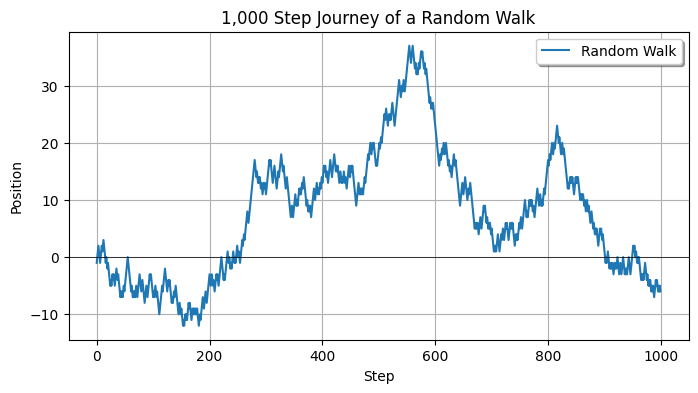

In [4]:
# Imagining a thousand steps up or down with equal probability and independence
# Note that I set the seed in this example for consistent pseudo randomness whenever this graph function is called ;)
random_walk()

While the line appears smooth, it still consist of 1,000 discrete jumps as described for a random walk process.

**No Uncertainty**  

If there was no uncertainty about the price $S(t)$ at $t > 0$,  

we might assume the growth rate to be constant $\mu$ and proportional to the change per unit of time.

$$\frac{dS(t)}{dt} = \mu S(t)$$

*- Side note*

This is very similar to one of the first differential equations taught in an undergraduate math class.  

It is a class of exponential growth and decay problems with obvious applications in finance, epidemiology, populations, social media and biological systems such as the Lotka–Volterra which describes the dynamics of predator and prey populations.

*- Back to applications in finance*  

Rearranging the equation
$$dS(t) \cdot \frac{1}{S(t)} = \mu dt$$ 

Solving for the left side
$$ln(S(t)) = \mu S(t)dt$$  

And integrating gives the general solution    
$$S(t) = S(0)e^{\mu t}$$  

So the assumption of no uncertainty results in an exponential price path.

**Introducing Uncertainty**  

*There is uncertainty* about the future price so how do we adjust our model?  

We start by adding the stochastic differential $dW(t)$ to represent the *Wiener process* or *Brownian motion* term $W(t)$.  

This process describes a continuous process with independent increments $dW(t)$.  

Each increment follows a normal distribution with mean of zero and variance of $dt$.  

This diffusion coefficient $\sigma$ is added and our price model becoming  

$$ \frac{dS(t)}{S(t)} = \mu dt + \sigma dW(t)$$  

Noting that the diffusion coefficient $\sigma$ is a constant as the left side of the equation is the proportional change in price at time $t$ and therefore an example of *geometric Brownian Motion*.  

If the left side was $dS(t)$ it would be *arithmetic Brownian motion*. 

$\frac{dS(t)}{S(t)}$ has a normal distribution with a mean of $\mu dt$ and variance of $\sigma^2dt$  

We will cover all of this in more detail in the future with examples

### 1.3.6 Discrete and Continuous Compounding in Discrete Time

**Discrete Compounding**  

Returning to the one-period percentage return example  

$$R_t = \frac{P_t - P_{t - 1}}{P_{t - 1}} = \frac{\Delta P_t}{P_{t - 1}}$$

This can be expressed as  

$$1 + R_t = \frac{P_t}{P_{t - 1}}$$  

With the left hand side representing the *discrete compounding factor* and being equivalent to  

$$P_t = (1 + R_t)P_{t - 1}$$  

for one-period historical returns that are discretely compounded.  

**Continuous Compounding**  

Continuous compounding returns use log returns described by  

$$r_t = ln\left(\frac{P_t}{P_{t - 1}}\right) = lnP_t - lnP_{t - 1} = \Delta lnP_{t}$$  

for one-period historical returns when continuously compounded.

This can also be expressed as  

$$e^{r_t} = \frac{P_t}{P_{t - 1}}$$  

The left hand side $e^{r_t}$ is the *continuous compounding factor* since it is equivalent to  

$$P_t = e^{r_t}P_{t - 1}$$

$\text{Example}$  

Initial price of an asset $P_0 = 100$.  

The price at $P_1 = 105$.  

So the return at $r_1 = ln(105) = 4.879\%$  (continuous compounding)  

Or the return at $R_1 = \frac{105 - 100}{100} = 5.000\%$ (discrete compounding)  

And using our equation above  

$$105 = exp(0.04879) \ \text{x} \ 100 = 1.05 \ \text{x} \ 100$$

We see that the continuous compounding rate is *less* than the discrete rate, but this makes sense as the returns are continuously compounded.  


### 1.3.7 Period Log Returns in Discrete Time

The log return is a good approximation if the return is small and is often used to measure returns for daily data.  

The forward looking one-period form of the continuous definitions in 1.3.6 are denoted as  

$$r_t = ln\left(\frac{P_{t + 1}}{P_t}\right) = ln P_{t + 1} - ln P_t = \Delta lnP_t$$  

**h-period returns**  

In practice we need to be able to predict risk over several forward-looking periods denoted as $h$.  

The forward-looking *h-period return* using the forward difference operator $\Delta_h$ is defined by  

$$R_{ht} = \left(\frac{P_{t + h} - P_t}{P_t}\right) = \left(\frac{\Delta_h P_t}{P_t}\right)$$  

and  

$$r_{ht} = ln\left(\frac{P_{t + h}}{P_t}\right) = ln P_{t + h} - ln P_t = \Delta_h ln P_{t}$$  

for *h-period log returns*

This can also be expressed using sigma notation as  

$$r_{ht} = \sum_{i = 0}^{h - 1} r_{t + i}$$  

or equivalently  

$$\Delta_h ln P_{t} = \sum_{i = 0}^{h - 1}  \Delta ln_{t + i}$$  

and the back-looking historical h-period returns equivalent  

$$r_{ht} = \sum_{i = 1}^{h} r_{t - i}$$  

shows the h-period log return is the sum of consecutive h-period log returns which make log returns easier to analyse and the preferred method to work with.

$\text{Example using daily prices of the S\&P500 from yahoo finance}$

In [5]:
import yfinance as yf

# Define the ticker symbol for the S&P 500
ticker = '^GSPC'

# Define the start and end dates
start_date = '2024-11-01'
end_date = '2024-11-29'

# Download the daily price data
data = yf.download(ticker, start=start_date, end=end_date)

# Reset the index so 'Date' becomes a column
data.reset_index(inplace=True)

# Flatten the multi-level column hierarchy (if it exists)
# This step will ensure the column names are just 'Open', 'Low', 'Close', etc., not multi-level
data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']

# Add the Ticker column with the same value for every row
data['Ticker'] = ticker

# Reorganize the columns to match your desired order
data = data[['Ticker', 'Date', 'Open', 'Low', 'Close', 'Adj Close', 'Volume']]

# Convert the 'Date' column from datetime to date (removes the time part)
data['Date'] = data['Date'].dt.date

# View first 10 observations
data.head(10)

[*********************100%***********************]  1 of 1 completed


,Ticker,Date,Open,Low,Close,Adj Close,Volume
0,^GSPC,2024-11-01,5728.799805,5772.520020,5723.220215,5723.220215,3796450000
1,^GSPC,2024-11-04,5712.689941,5741.430176,5696.509766,5725.149902,3602060000
2,^GSPC,2024-11-05,5782.759766,5783.439941,5722.100098,5722.430176,3768310000
3,^GSPC,2024-11-06,5929.040039,5936.140137,5864.890137,5864.890137,6329530000
4,^GSPC,2024-11-07,5973.100098,5983.839844,5947.209961,5947.209961,4925740000
5,^GSPC,2024-11-08,5995.540039,6012.450195,5976.759766,5976.759766,4666740000
6,^GSPC,2024-11-11,6001.350098,6017.310059,5986.689941,6008.859863,4333000000
7,^GSPC,2024-11-12,5983.990234,6009.919922,5960.080078,6003.600098,4243400000
8,^GSPC,2024-11-13,5985.379883,6008.189941,5965.910156,5985.750000,4220180000
9,^GSPC,2024-11-14,5949.169922,5993.879883,5942.279785,5989.680176,4184570000


Calculate the daily, weekly and 5 day rolling sum log returns using the adjusted closing price.

In [6]:
# Calculate Daily Log Return for Adjusted Close
data['Daily Log Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1))

# Calculate Weekly Log Return for Adjusted Close
# We resample the data to weekly frequency and calculate the log return
data['Weekly Log Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(5))

# Calculate the rolling sum of the Daily Log Returns for the last 5 days
data['Sum of Rolling 5-Day Daily Log Returns'] = data['Daily Log Return'].rolling(window=5).sum()

data.head(10)

,Ticker,Date,Open,Low,Close,Adj Close,Volume,Daily Log Return,Weekly Log Return,Sum of Rolling 5-Day Daily Log Returns
0,^GSPC,2024-11-01,5728.799805,5772.520020,5723.220215,5723.220215,3796450000,NaN,NaN,NaN
1,^GSPC,2024-11-04,5712.689941,5741.430176,5696.509766,5725.149902,3602060000,0.000337,NaN,NaN
2,^GSPC,2024-11-05,5782.759766,5783.439941,5722.100098,5722.430176,3768310000,-0.000475,NaN,NaN
3,^GSPC,2024-11-06,5929.040039,5936.140137,5864.890137,5864.890137,6329530000,0.024590,NaN,NaN
4,^GSPC,2024-11-07,5973.100098,5983.839844,5947.209961,5947.209961,4925740000,0.013938,NaN,NaN
5,^GSPC,2024-11-08,5995.540039,6012.450195,5976.759766,5976.759766,4666740000,0.004956,0.043347,0.043347
6,^GSPC,2024-11-11,6001.350098,6017.310059,5986.689941,6008.859863,4333000000,0.005356,0.048366,0.048366
7,^GSPC,2024-11-12,5983.990234,6009.919922,5960.080078,6003.600098,4243400000,-0.000876,0.047966,0.047966
8,^GSPC,2024-11-13,5985.379883,6008.189941,5965.910156,5985.750000,4220180000,-0.002978,0.020398,0.020398
9,^GSPC,2024-11-14,5949.169922,5993.879883,5942.279785,5989.680176,4184570000,0.000656,0.007116,0.007116


We see the weekly log return and sum of the rolling 5 day log returns are the same.

### 1.3.8 Return on a Linear Portfolio

For a long-only portfolio the return is a weighted sum of the asset returns with the weights of the portfolio determined at the beginning of the period.  

From time 0 to time 1 the one-period percentage return is defined as  

$$R = \frac{P_1 - P_0}{P_0}$$  

And with $k$ assets in the portfolio  

$$1+ R = \sum_{i = 1}^{k}w_i (1 + R_i) = \sum_{i = 1}^{k}w_i + \sum_{i = 1}^{k}w_{i}R_{i} = 1 + \sum_{i = 1}^{k}w_{i}R_{i}$$  

So  

$$1+ R = 1 + \sum_{i = 1}^{k}w_{i}R_{i}$$

or simply  

$$R = \sum_{i = 1}^{k}w_{i}R_{i}$$  

which describes the return as a *linear* function of the weights and returns of the underlying assets.

### 1.3.9 Sources of Returns

This *linear portfolio* demonstrates that the return as well as the risk are attributed to either  

- Changes in the prices of the underlying assets
- Changes in the weights of the portfolio  

$\text{Examples}$  


*Consider a portfolio that has 60% invested in Asset 1 and 40% invested in Asset 2*.  

**Scenario 1**

The holdings are held constant (no rebalancing)


In [7]:
# Scenario 1 holdings constant and no rebalancing so we just need to find the portfolio return to
# complete our previous two asset example. Creating a copy of previous example to be explicit
# for the new scenarios

no_rebalancing = two_assets.copy()

# Calculate the return of the portfolio
no_rebalancing["Portfolio Return"] = no_rebalancing["Portfolio Value"].pct_change().fillna(0)

# Calculate the return of each asset
no_rebalancing["Asset 1 Return"] = no_rebalancing["Asset 1 Price"].pct_change().fillna(0)
no_rebalancing["Asset 2 Return"] = no_rebalancing["Asset 2 Price"].pct_change().fillna(0)

# Reorganise the columns
no_rebalancing = no_rebalancing[["Year", "Asset 1 Price", "Asset 2 Price", "Asset 1 Units", "Asset 2 Units", "Asset 1 Weight",
                                 "Asset 2 Weight", "Asset 1 Value", "Asset 2 Value", "Asset 1 Return", "Asset 2 Return",
                                 "Portfolio Value", "Portfolio Return"]]
no_rebalancing

,Year,Asset 1 Price,Asset 2 Price,Asset 1 Units,Asset 2 Units,Asset 1 Weight,Asset 2 Weight,Asset 1 Value,Asset 2 Value,Asset 1 Return,Asset 2 Return,Portfolio Value,Portfolio Return
0,2021,100,200,600,200,0.6000,0.4000,60000,40000,0.00,0.0,100000,0.00000
1,2022,125,500,600,200,0.4286,0.5714,75000,100000,0.25,1.5,175000,0.75000
2,2023,80,250,600,200,0.4898,0.5102,48000,50000,-0.36,-0.5,98000,-0.44000
3,2024,120,400,600,200,0.4737,0.5263,72000,80000,0.50,0.6,152000,0.55102


**Scenario 2**

The weights are held constant (improbable to do continuosly, but rebalancing ever quarter for this example)

In [8]:
# Create a copy of no rebalancing data frame to bring in asset return details and drop
# columns that are not relevant to the rebalanced portfolio and replace NAs with 0.
rebalanced_weights = no_rebalancing.drop(columns = ["Asset 1 Units", "Asset 2 Units", "Asset 1 Weight", "Asset 2 Weight",
                                                 "Asset 1 Value", "Asset 2 Value", "Portfolio Value", "Portfolio Return"]).copy()

# Set initial investment value
initial_value = 100000

# Set fixed weights
rebalanced_weights["Asset 1 Weight"] = 0.6
rebalanced_weights["Asset 2 Weight"] = 0.4
rebalanced_weights

,Year,Asset 1 Price,Asset 2 Price,Asset 1 Return,Asset 2 Return,Asset 1 Weight,Asset 2 Weight
0,2021,100,200,0.00,0.0,0.6,0.4
1,2022,125,500,0.25,1.5,0.6,0.4
2,2023,80,250,-0.36,-0.5,0.6,0.4
3,2024,120,400,0.50,0.6,0.6,0.4


In [9]:
# Calculate return and value of the portfolio using the fixed weights and asset returns
rebalanced_weights["Portfolio Return (Rebalanced)"] = (rebalanced_weights["Asset 1 Weight"] * rebalanced_weights['Asset 1 Return']) + (rebalanced_weights["Asset 2 Weight"] * rebalanced_weights['Asset 2 Return'])
rebalanced_weights["Portfolio Value (Rebalanced)"] = initial_value * (1 + rebalanced_weights["Portfolio Return (Rebalanced)"]).cumprod()
rebalanced_weights["Portfolio Value (Rebalanced)"] = rebalanced_weights["Portfolio Value (Rebalanced)"].astype(int)
rebalanced_weights

,Year,Asset 1 Price,Asset 2 Price,Asset 1 Return,Asset 2 Return,Asset 1 Weight,Asset 2 Weight,Portfolio Return (Rebalanced),Portfolio Value (Rebalanced)
0,2021,100,200,0.00,0.0,0.6,0.4,0.000,100000
1,2022,125,500,0.25,1.5,0.6,0.4,0.750,175000
2,2023,80,250,-0.36,-0.5,0.6,0.4,-0.416,102200
3,2024,120,400,0.50,0.6,0.6,0.4,0.540,157388


In [10]:
# Derive the rebalanced impact to the starting units invested each year
rebalanced_weights["Asset 1 Units (Rebalanced)"] = round((rebalanced_weights["Portfolio Value (Rebalanced)"] *0.6)/(rebalanced_weights["Asset 1 Price"]), 0).astype(int)
rebalanced_weights["Asset 2 Units (Rebalanced)"] = round((rebalanced_weights["Portfolio Value (Rebalanced)"] *0.4)/(rebalanced_weights["Asset 2 Price"]), 0).astype(int)

# Calculate the value of the assets each year
rebalanced_weights["Asset 1 Value"] = rebalanced_weights["Asset 1 Price"] * rebalanced_weights["Asset 1 Units (Rebalanced)"]
rebalanced_weights["Asset 2 Value"] = rebalanced_weights["Asset 2 Price"] * rebalanced_weights["Asset 2 Units (Rebalanced)"]

# Organise the columns in similar order to constant position portfolio
rebalanced_weights = rebalanced_weights[["Year", "Asset 1 Price", "Asset 2 Price", "Asset 1 Units (Rebalanced)", "Asset 2 Units (Rebalanced)",
                                         "Asset 1 Weight", "Asset 2 Weight", "Asset 1 Value", "Asset 2 Value", "Asset 1 Return", "Asset 2 Return",
                                          "Portfolio Value (Rebalanced)", "Portfolio Return (Rebalanced)"]]

rebalanced_weights

,Year,Asset 1 Price,Asset 2 Price,Asset 1 Units (Rebalanced),Asset 2 Units (Rebalanced),Asset 1 Weight,Asset 2 Weight,Asset 1 Value,Asset 2 Value,Asset 1 Return,Asset 2 Return,Portfolio Value (Rebalanced),Portfolio Return (Rebalanced)
0,2021,100,200,600,200,0.6,0.4,60000,40000,0.00,0.0,100000,0.000
1,2022,125,500,840,140,0.6,0.4,105000,70000,0.25,1.5,175000,0.750
2,2023,80,250,766,164,0.6,0.4,61280,41000,-0.36,-0.5,102200,-0.416
3,2024,120,400,787,157,0.6,0.4,94440,62800,0.50,0.6,157388,0.540


In [11]:
portfolio_returns = pd.DataFrame({"Year": no_rebalancing["Year"], 
                                  "Constant Holdings Value": no_rebalancing["Portfolio Value"],
                                  "Constant Holdings Return": no_rebalancing["Portfolio Return"],
                                  "Constant Weights Value": rebalanced_weights["Portfolio Value (Rebalanced)"],
                                  "Constant Weights Return": rebalanced_weights["Portfolio Return (Rebalanced)"]})

portfolio_returns

,Year,Constant Holdings Value,Constant Holdings Return,Constant Weights Value,Constant Weights Return
0,2021,100000,0.00000,100000,0.000
1,2022,175000,0.75000,175000,0.750
2,2023,98000,-0.44000,102200,-0.416
3,2024,152000,0.55102,157388,0.540


So we can see did better in the rebalanced portfolio, but as noted early constant rebalancing is not only unfeasible, but will come with high transaction costs as well. It is best to do so at an interval set out by the portfolio that meets the needs of the clients.  

The author does note that the constant weight assumption greatly simplifies analysis for theoretical risk models, but ex post risk and return can be calculated with the actual historical weights and values of the underlying assets. So the ex post analysis does not require the constant weight assumption, but can be made for simplification purposes.  

Forecasting risk for ex ante analysis will keep the weights constant to capture the risk arising from changes in the asset returns as the sole influence on the change in the portfolio's value.  